In [1]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [2]:
import arrow
import netCDF4 as nc
import glob
import numpy as np
import time
import xarray as xr
import matplotlib.pyplot as plt
from salishsea_tools import visualisations as vis
import cmocean as cm

# Daily averaging codes for spring-summer phyto are here:

    dir: /data/tjarniko/MEOPAR/analysis_tereza/notebooks/CLUSTER_PAPER/CLEAN/KEY_PAPERFIGURES/extraction_scripts

    script style eg: 2013_spring_summer_phyto_daily_avg.py


# seasonal averaging!

In [3]:
spr_st = 59; spr_e = 151; sum_st = 151; sum_e = 243;
#'2015-03-01' '2015-06-01'
#'2015-06-01' '2015-08-31

#/results2/SalishSea/hindcast.201905/'
yr = '2013'
start =f'{yr}-06-01'
end =f'{yr}-08-31'

start_run = arrow.get(start)
end_run = arrow.get(end)

arrow_array = []
for r in arrow.Arrow.span_range('day', start_run, end_run):
    arrow_array.append(r)
dayslen = len(arrow_array)
print(dayslen)
    
diat = np.zeros([dayslen,40,898,398])
flag = np.zeros([dayslen,40,898,398])
cili = np.zeros([dayslen,40,898,398])

for i in range(0,dayslen):
    

    tdate = arrow_array[i][0]
    
    mm = tdate.format('MM')
    dd = tdate.format('DD')
    yy = tdate.format('YYYY')
    d_str = f'{yy}{mm}{dd}'
    ptrc_str = f'/data/tjarniko/results/hindcast.201905_dayavg_phyto/ptrc_phyto_1d_{d_str}.nc'
    t_dat = glob.glob(ptrc_str)
    print(t_dat[0])
    t0 = time.time()
    w = nc.Dataset(t_dat[0])
    diat[i,:,:,:] = w['model_output']['diatoms'][:]
    flag[i,:,:,:] = w['model_output']['flagellates'][:]
    cili[i,:,:,:] = w['model_output']['ciliates'][:]
    w.close()
    t1 = time.time()
    total = t1-t0
    #print(f'seconds taken: {str(total)}')
    
cili_s = np.nanmean(cili, axis = 0)
flag_s = np.nanmean(flag, axis = 0)
diat_s = np.nanmean(diat, axis = 0)

ncname = './pkls/2013_SUM_phyto.nc'


f = nc.Dataset(ncname,'w', format='NETCDF4') #'w' stands for write
g = f.createGroup('model_output')
g.createDimension('depths', 40)
g.createDimension('ydir',898)
g.createDimension('xdir',398)

ts = g.createVariable('diatoms','f4',('depths','ydir','xdir'))
ts[:] = diat_s
ts = g.createVariable('flagellates','f4',('depths','ydir','xdir'))
ts[:] = flag_s
ts = g.createVariable('ciliates','f4',('depths','ydir','xdir'))
ts[:] = cili_s

f.close()

92
/data/tjarniko/results/hindcast.201905_dayavg_phyto/ptrc_phyto_1d_20130601.nc
/data/tjarniko/results/hindcast.201905_dayavg_phyto/ptrc_phyto_1d_20130602.nc
/data/tjarniko/results/hindcast.201905_dayavg_phyto/ptrc_phyto_1d_20130603.nc
/data/tjarniko/results/hindcast.201905_dayavg_phyto/ptrc_phyto_1d_20130604.nc
/data/tjarniko/results/hindcast.201905_dayavg_phyto/ptrc_phyto_1d_20130605.nc
/data/tjarniko/results/hindcast.201905_dayavg_phyto/ptrc_phyto_1d_20130606.nc
/data/tjarniko/results/hindcast.201905_dayavg_phyto/ptrc_phyto_1d_20130607.nc
/data/tjarniko/results/hindcast.201905_dayavg_phyto/ptrc_phyto_1d_20130608.nc
/data/tjarniko/results/hindcast.201905_dayavg_phyto/ptrc_phyto_1d_20130609.nc
/data/tjarniko/results/hindcast.201905_dayavg_phyto/ptrc_phyto_1d_20130610.nc
/data/tjarniko/results/hindcast.201905_dayavg_phyto/ptrc_phyto_1d_20130611.nc
/data/tjarniko/results/hindcast.201905_dayavg_phyto/ptrc_phyto_1d_20130612.nc
/data/tjarniko/results/hindcast.201905_dayavg_phyto/ptrc_phyt

# average and store in local nc - change to SPR if necessary

In [19]:
# cili[0,0,250,250]
# cili_s = np.nanmean(cili, axis = 0)

MemoryError: Unable to allocate array with shape (92, 40, 898, 398) and data type float64

In [4]:
# cili_s = np.nanmean(cili, axis = 0)
# flag_s = np.nanmean(flag, axis = 0)
# diat_s = np.nanmean(diat, axis = 0)

# ncname = './pkls/2013_SUM_phyto.nc'


# f = nc.Dataset(ncname,'w', format='NETCDF4') #'w' stands for write
# g = f.createGroup('model_output')
# g.createDimension('depths', 40)
# g.createDimension('ydir',898)
# g.createDimension('xdir',398)

# ts = g.createVariable('diatoms','f4',('depths','ydir','xdir'))
# ts[:] = diat_s
# ts = g.createVariable('flagellates','f4',('depths','ydir','xdir'))
# ts[:] = flag_s
# ts = g.createVariable('ciliates','f4',('depths','ydir','xdir'))
# ts[:] = cili_s

# f.close()

## seasonal thalwegs

In [25]:
print(phyt_sum[:,250,250])
print(diat_sum[:,250,250])
print(flag_sum[:,250,250])
print(cili_sum[:,250,250])

[2.0788228511810303 2.059720754623413 2.0154500007629395
 1.9647753238677979 1.907698154449463 1.848752498626709 1.7882342338562012
 1.7281885147094727 1.670899510383606 1.6143577098846436
 1.5567022562026978 1.5016815662384033 1.4484360218048096
 1.3972599506378174 1.347264289855957 1.2974982261657715
 1.2457820177078247 1.1907230615615845 1.1292102336883545
 1.0535916090011597 0.9550421237945557 0.8257583379745483
 0.6498947739601135 0.4485335350036621 0.33320555090904236
 0.23554453253746033 0.19692668318748474 0.1860663890838623 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0]
[1.5471311807632446 1.5329283475875854 1.4967303276062012
 1.4549545049667358 1.407365083694458 1.3580453395843506
 1.3074225187301636 1.2574492692947388 1.2102150917053223
 1.163576364517212 1.1158686876296997 1.0707796812057495
 1.0273479223251343 0.9858565926551819 0.9453673958778381
 0.9053743481636047 0.8638479709625244 0.8200035691261292
 0.771364152431488 0.712315559387207 0.6362807154655457 0.5381908

In [5]:
ncname = './pkls/2013_SUM_phyto.nc'
w = nc.Dataset(ncname)
diat_sum = w['model_output']['diatoms'][:]
flag_sum = w['model_output']['flagellates'][:]
cili_sum = w['model_output']['ciliates'][:]
phyt_sum = diat_sum + flag_sum + cili_sum

ncname = './pkls/2013_SPR_phyto.nc'
w = nc.Dataset(ncname)
diat_spr = w['model_output']['diatoms'][:]
flag_spr = w['model_output']['flagellates'][:]
cili_spr = w['model_output']['ciliates'][:]
phyt_spr = diat_spr + flag_spr + cili_spr

bathy = nc.Dataset('/data/tjarniko/MEOPAR/grid/bathymetry_201702.nc')
mesh = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')

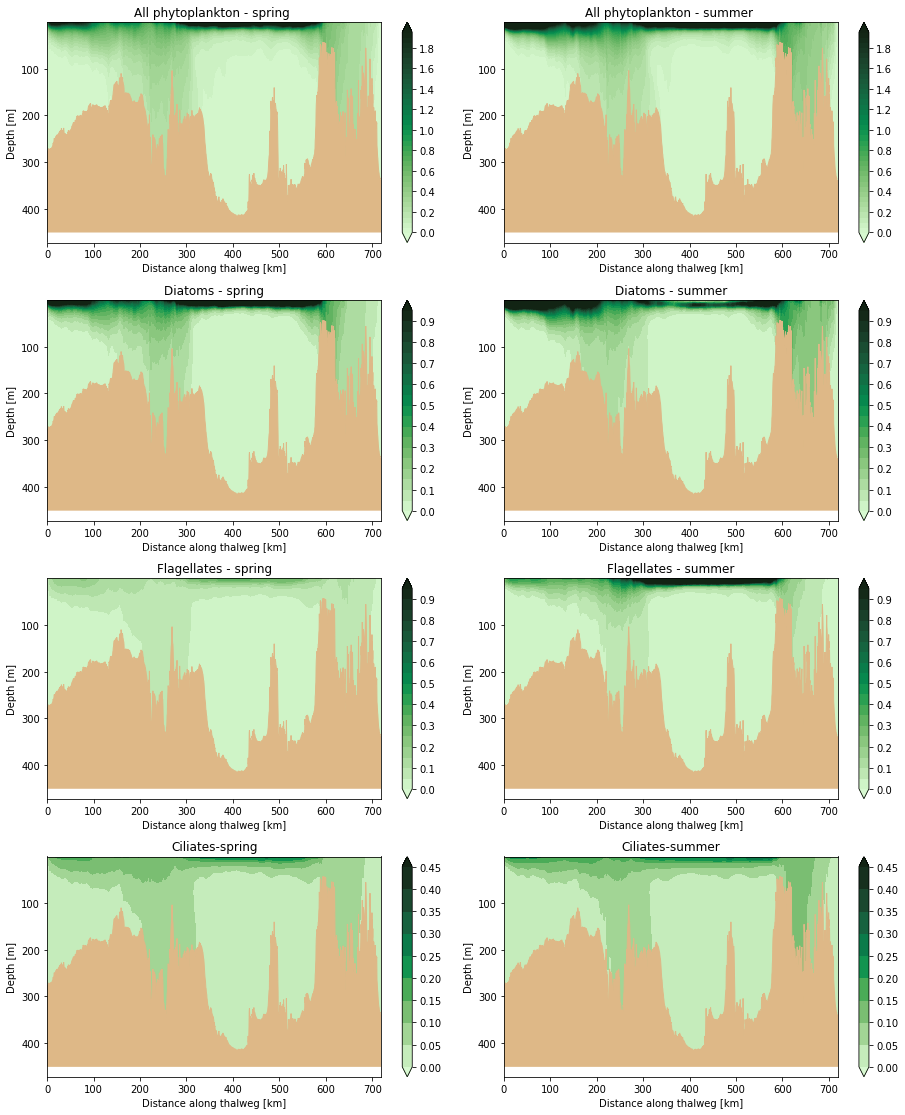

In [28]:
fact = 1.3
tmin = np.zeros(8)
tmax = [4,4,3,3,1,1,0.5,0.5,]
step = 0.05

fig, axs = plt.subplots(4,2, figsize=(10*fact, 12*fact), facecolor='w', edgecolor='k')\

phy_boxes = [phyt_spr, phyt_sum, diat_spr, diat_sum, flag_spr, flag_sum, cili_spr,\
            cili_sum ]
tits = ['All phytoplankton - spring ', 'All phytoplankton - summer ',
        'Diatoms - spring', 'Diatoms - summer', 'Flagellates - spring', \
       'Flagellates - summer', 'Ciliates-spring', 'Ciliates-summer',]
axs = axs.ravel()\

for i in range(0,8):
    
    ax1 = axs[i]
    vis.contour_thalweg(ax1, phy_boxes[i], bathy, mesh,\
                    np.arange(tmin[i], tmax[i], step), cmap = cm.cm.algae)  
    ax1.set_title(tits[i])
    
# vis.contour_thalweg(ax3, BR3_DIC_summer, bathy, meshmask,\
#                     np.arange(dicmin_twg, dicmax_twg, dicstep), cmap = cm.matter)

# ts = 8 # title font
# fs = 8 # all other font sizes
# fact = 8
# fig = plt.figure(figsize=(19/2.54,23*(2/3)/2.54),dpi = 300)

# ax1 = plt.subplot2grid((4,2), (0,0), colspan=0, rowspan=0)
# #PI5_summer_3mon[PI5_summer_3mon > 1e10] = 1.1
# cbar = \
# vis.contour_thalweg(ax1, diat_sum, bathy, mesh,\
#                     np.arange(0.0, 2.0, 0.05), cmap = cm.cm.balance_r)
# ax1.set_title(r'$\bf{a)}$ $\Omega_{arag}$ Summer Average (preindustrial)',fontsize = ts)
# cbar.ax.tick_params(labelsize=fs) 
# cbar.set_label('$\Omega_{arag}$', fontsize = fs)
# ax1.tick_params(axis='both', which='major', labelsize=fs)
# ax1.set_xlabel('Distance along thalweg [km]', fontsize = fs)
# ax1.set_ylabel('depth [m]', fontsize = fs)


plt.tight_layout()
#plt.savefig('Fig4a_d.jpg')

In [ ]:

# start = '2013-03-01'
# end = '2013-08-31'
# noday = 365

# import matplotlib.pyplot as plt
# import netCDF4 as nc
# import numpy as np
# import scipy as sp
# import warnings
# warnings.filterwarnings('ignore')
# import datetime as dt
# import glob
# import arrow
# import time
# from datetime import datetime

# def make_nclen(start,end):
#     fn_ar_ptrc = []
#     fn_ar_grid = []
#     start_run = arrow.get(start)
#     end_run = arrow.get(end)
#     arrow_array = []
#     for r in arrow.Arrow.span_range('day', start_run, end_run):
#         arrow_array.append(r)

#     dayslen = len(arrow_array)
#     for i in range(0,dayslen):
#         tdate = arrow_array[i][0]
#         ddmmmyy = tdate.format('DDMMMYY').lower()
#         ymd = tdate.format('YYYYMMDD')
#         nc_sens_ptrc = '/results2/SalishSea/hindcast.201905/' + ddmmmyy + '/*ptrc*.nc'
#         tnc_sens_ptrc = glob.glob(nc_sens_ptrc)
#         fn_ar_ptrc.append(tnc_sens_ptrc[0])
#         nc_sens_grid = '/results2/SalishSea/hindcast.201905/' + ddmmmyy + '/*grid*.nc'
#         tnc_sens_grid = glob.glob(nc_sens_grid)
#         fn_ar_grid.append(tnc_sens_grid[0])

#     return fn_ar_ptrc, fn_ar_grid

# def make_fname_ar(start,end,tstr):
#     fn_ar = []
#     start_run = arrow.get(start)
#     end_run = arrow.get(end)
#     arrow_array = []
#     for r in arrow.Arrow.span_range('day', start_run, end_run):
#         arrow_array.append(r)

#     dayslen = len(arrow_array)
#     for i in range(0,dayslen):
#         tdate = arrow_array[i][0]
#         ymd = tdate.format('YYYYMMDD')
#         fname = tstr + ymd +'.nc'
#         fn_ar.append(fname)

#     return fn_ar

# fn_ar_ptrc, fn_ar_grid = make_nclen(start,end)
# tstr = 'ptrc_phyto_1d_'
# avgdnc_ar_ptrc = make_fname_ar(start,end,tstr)

# for i in range(0,noday):

#     tptrc = fn_ar_ptrc[i]
#     fn = avgdnc_ar_ptrc[i]
#     print(fn)

#     t = time.time()
#     ptrc = nc.Dataset(tptrc)
# #     print(ptrc)
#     diat = ptrc['diatoms'][:]
#     diat_d = np.nanmean(diat, axis = 0)
#     flag = ptrc['flagellates'][:]
#     flag_d = np.nanmean(flag, axis = 0)
#     cili = ptrc['ciliates'][:]
#     cili_d = np.nanmean(cili, axis = 0)
#     ptrc.close()
#     t2 = time.time()
#     print(t2-t)

#     tdir = '/data/tjarniko/results/hindcast.201905_dayavg_phyto/'
#     ncname = tdir + fn

#     f = nc.Dataset(ncname,'w', format='NETCDF4') #'w' stands for write
#     g = f.createGroup('model_output')
#     g.createDimension('depths', 40)
#     g.createDimension('ydir',898)
#     g.createDimension('xdir',398)

#     ts = g.createVariable('diatoms','f4',('depths','ydir','xdir'))
#     ts[:] = diat_d
#     ts = g.createVariable('flagellates','f4',('depths','ydir','xdir'))
#     ts[:] = flag_d
#     ts = g.createVariable('ciliates','f4',('depths','ydir','xdir'))
#     ts[:] = cili_d

#     f.close()
